# Cat detector!

In this short exercice you will learn how to use a classifier to find objects in a picture. 

The classifier, using a prepared haarcascade file, can recognize cat faces. The classifier is created using the origami function *new-cascadeclassifier* and the haarcascade xml configuration file.

The xml is the result of a training performed outside of this recipe, but the classifiers themselves are available and can readily be used within your application.

## Detecting cats ...

We will start by getting the usual origami namespaces.:
- core, is the main namespace and contains all the opencv imported function
- utils, is custom made to bring a bit of sugar in your origami code
- rgb, helps by bringing a set of usual colors ready to be used

In [1]:
(ns catsdetector
  (:require
    [opencv4.utils :as u]
    [opencv4.colors.rgb :as rgb]
    [opencv4.core :refer :all]))

nil

In [2]:
(def detector 
  (new-cascadeclassifier 
    "resources/XML/haarcascade_frontalcatface.xml"))

(defn apply-detector [mat]
  (let[ rects (new-matofrect)]
  (.detectMultiScale detector mat rects)
  (.toArray rects)))

#'catsdetector/apply-detector

In [3]:
(def mycat (-> "resources/chapter02/emilie1.jpg" imread (u/resize-by 0.1)))
(doseq [r (apply-detector mycat)] (println r))

#object[org.opencv.core.Rect 0x73e0c997 {141, 53, 155x155}]


nil

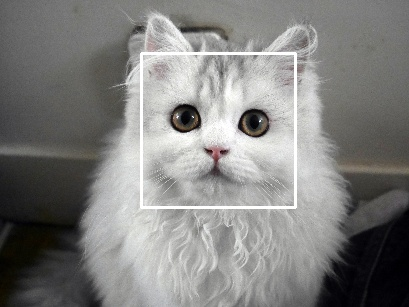

In [4]:
(doseq [r (apply-detector mycat)] (rectangle mycat r rgb/white 2))
(u/>>> mycat)

In [5]:
(defn add-label! [buffer rects]
  (put-text! buffer (str (count (.toArray rects) ) " cat(s) " )
     (new-point 30 100) FONT_HERSHEY_PLAIN 2 rgb/magenta-2 2))

(defn draw-rects! [buffer rects]
   (doseq [r (.toArray rects)]
     (-> buffer
      (submat r)
      (apply-color-map! COLORMAP_WINTER)
      (copy-to (submat buffer r))))
      buffer)

(defn detect-cats! [mat]
  (let [  rects (new-matofrect) ]
   (.detectMultiScale detector mat rects)
   (-> mat
    (draw-rects! rects)
    (add-label! rects))))

#'catsdetector/detect-cats!

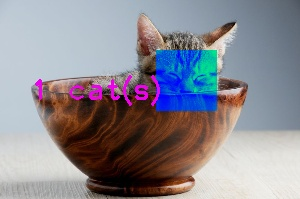

In [6]:
(-> "https://raw.githubusercontent.com/hellonico/origami/master/doc/cat_in_bowl.jpeg"
    (u/mat-from-url)
    (u/resize-by 0.3)
    (detect-cats!)
    (u/>>>))

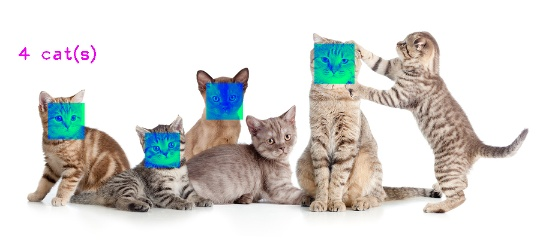

In [7]:
(-> "https://www.fetchpetcare.com/wp-content/uploads/2016/02/Cat-breeds-various-featured.jpg"
    (u/mat-from-url)
    (detect-cats!)
    (u/resize-by 0.6)
    (u/>>>))

## Detecting people faces

In [8]:
(def faces-detector 
  (new-cascadeclassifier 
    "resources/XML2/haarcascade_frontalface_alt2.xml"))

(defn label-people! [buffer rects]
  (put-text! buffer (str (count (.toArray rects) ) " face(s) " )
     (new-point 30 100) FONT_HERSHEY_PLAIN 2 rgb/magenta-2 2))

(defn detect-people! [mat]
  (let [  rects (new-matofrect) ]
   (.detectMultiScale faces-detector mat rects)
   (-> mat
    (draw-rects! rects)
    (label-people! rects))))

#'catsdetector/detect-people!

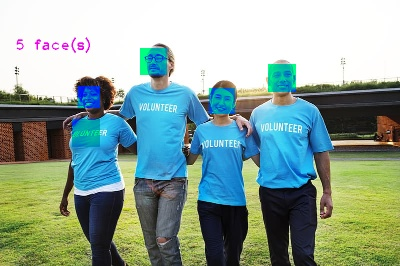

In [15]:
(-> "https://raw.githubusercontent.com/hellonico/origami-fun/master/resources/images/voluteers.jpg"
    (u/mat-from-url)
    (detect-people!)
    (u/resize-by 0.5)
    (u/>>>))

We'll also be happy to see that no cats has been found using the original cat classifier. 

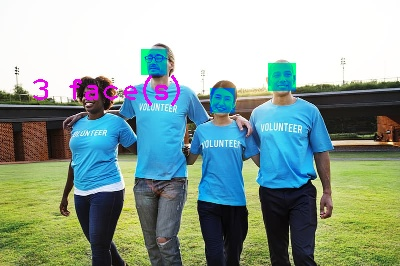

In [16]:
(-> "https://raw.githubusercontent.com/hellonico/origami-fun/master/resources/images/voluteers.jpg"
    (u/mat-from-url)
    (u/resize-by 0.5)
    (detect-people!)
    (u/>>>))

## Exercice

Using the *palm.xml* from the same folder, detect palms in a picture of your choice.